In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os, sys, importlib
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
sys.path.append('..') # Remonte au niveau du projet principal

import ift6758.visualizations.graphiques.advanced_graphiques_util as g
importlib.reload(g) 
import warnings
warnings.filterwarnings("ignore")

# Chemins absolus pour éviter les erreurs
PROJECT_ROOT = Path(__file__).resolve().parent.parent if '__file__' in globals() else Path.cwd().parent
DEST = PROJECT_ROOT / "data" / "raw"
OUT = PROJECT_ROOT / "figures" / "milestone1"

# Création des répertoires s'ils n'existent pas
DEST.mkdir(parents=True, exist_ok=True)
OUT.mkdir(parents=True, exist_ok=True)

# Charger l'image de la patinoire une seule fois
RINK_IMG_PATH = OUT / "nhl_rink_offense.png"
if not RINK_IMG_PATH.exists():
    raise FileNotFoundError(f"Image de patinoire non trouvée: {RINK_IMG_PATH}")
RINK_IMG = plt.imread(str(RINK_IMG_PATH))

## Visualisation des plans de tirs de l'équipe *Avalanche du Colorado* pour les saisons 2016-17 et 2020-21

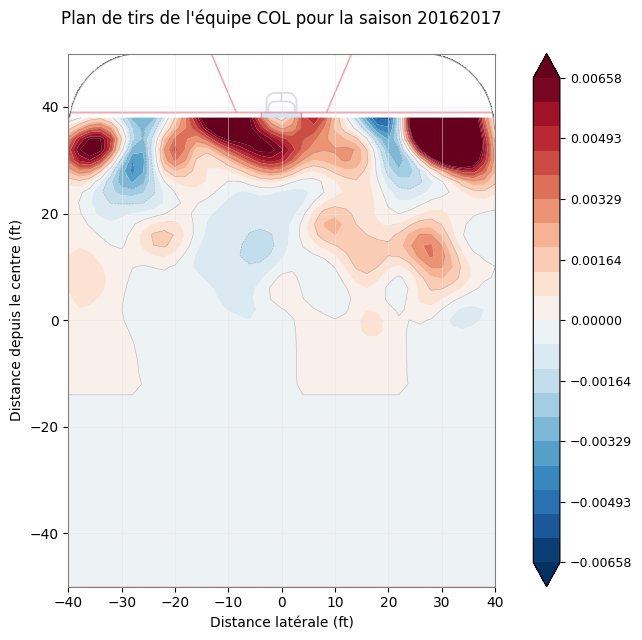

(<Figure size 1050x650 with 2 Axes>,
 <Axes: title={'center': "Plan de tirs de l'équipe COL pour la saison 20162017\n"}, xlabel='Distance latérale (ft)', ylabel='Distance depuis le centre (ft)'>)

In [3]:
saison = "20162017"
df_prep, meta = g.preparer_donnees_tirs_saison_csv(saison, str(DEST), RINK_IMG)
# Visualiser l'Avalanche 2016-2017
g.plot_team_season(df_prep, meta, team_name="COL", season=saison, sigma_lissage=1.6)

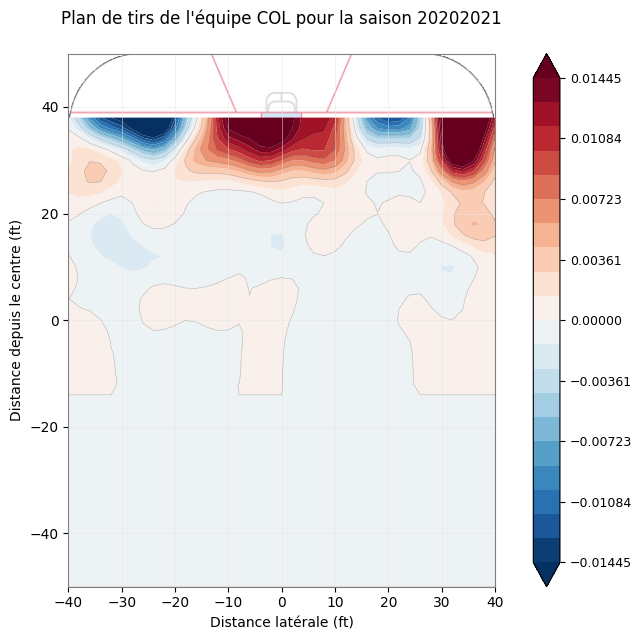

(<Figure size 1050x650 with 2 Axes>,
 <Axes: title={'center': "Plan de tirs de l'équipe COL pour la saison 20202021\n"}, xlabel='Distance latérale (ft)', ylabel='Distance depuis le centre (ft)'>)

In [4]:
saison = "20202021"
df_prep, meta = g.preparer_donnees_tirs_saison_csv(saison, str(DEST), RINK_IMG)
# Visualiser l'Avalanche 2020-2021
g.plot_team_season(df_prep, meta, team_name="COL", season=saison, sigma_lissage=1.6)

## Aperçu interactif Plotly de équipes pour les saisons 2016-17 à 2023-24 et Exports en html

In [5]:
# Liste des équipes et saisons disponibles
list_teams = sorted(df_prep['teamAbbr'].unique())
list_season = [f"{y}{y+1}" for y in range(2016, 2024)]
team_dropdown = Dropdown(options=list_teams, description='Équipe:')
season_dropdown = Dropdown(options=list_season, description='Saison:')

def plot_team_interactive(team_name, season):
    """Affiche le plan de tirs d'une équipe pour une saison donnée."""
    df_prep, meta = g.preparer_donnees_tirs_saison_csv(season, str(DEST), RINK_IMG)
    df_prep["idGame"] = df_prep["idGame"].astype(str)
    g.plot_team_season(df_prep, meta, team_name=team_name, season=season, sigma_lissage=1.6)

In [6]:
interact(plot_team_interactive, team_name=team_dropdown, season=season_dropdown)

interactive(children=(Dropdown(description='Équipe:', options=('ANA', 'ARI', 'BOS', 'BUF', 'CAR', 'CBJ', 'CGY'…

<function __main__.plot_team_interactive(team_name, season)>

## Compairaison des plans de tirs des équipes Sabres de Buffalo et Lightning de Tamba Bay pour les saisons 2018-19, 2019-20 et 2020-21

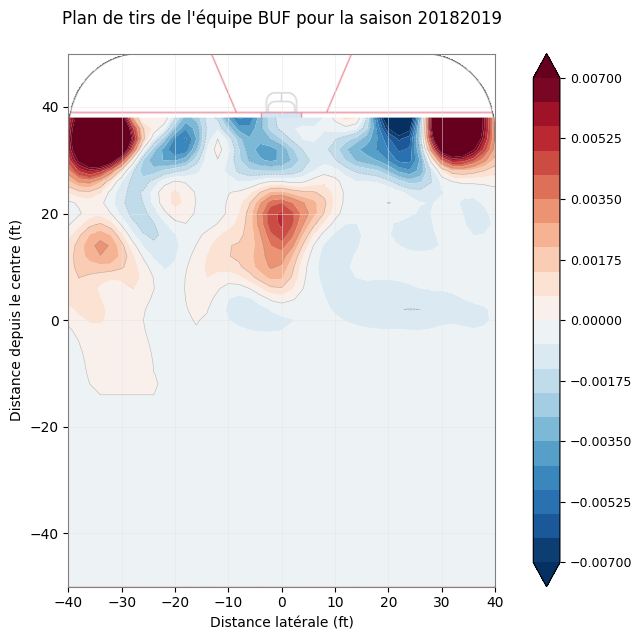

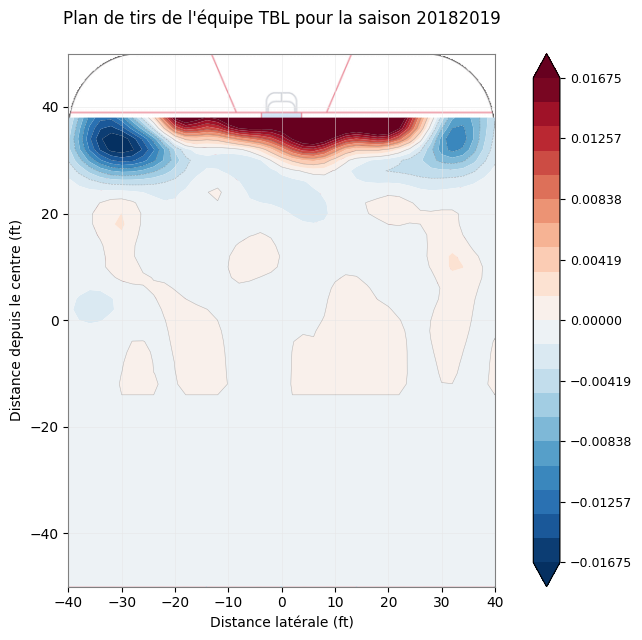

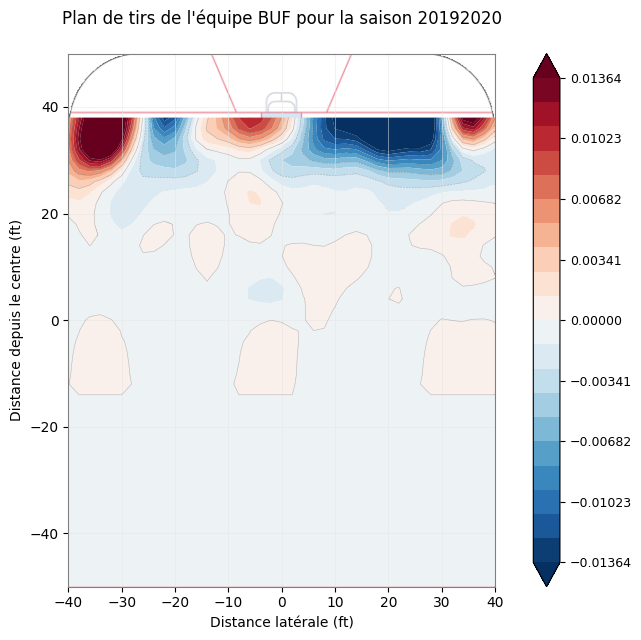

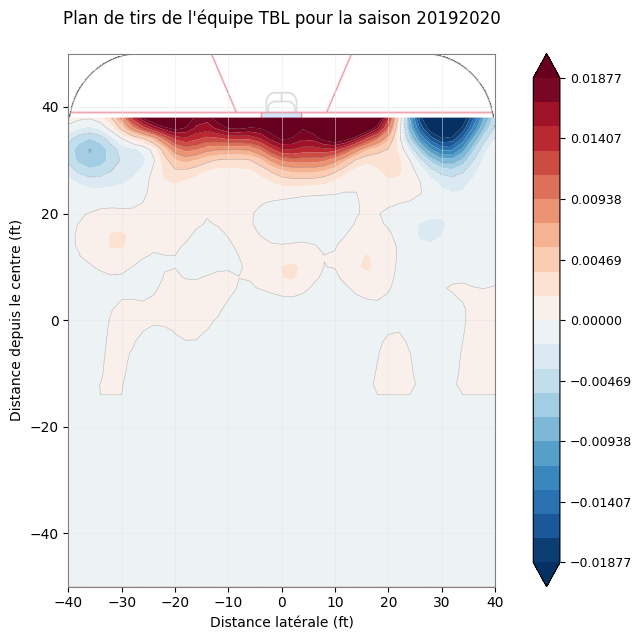

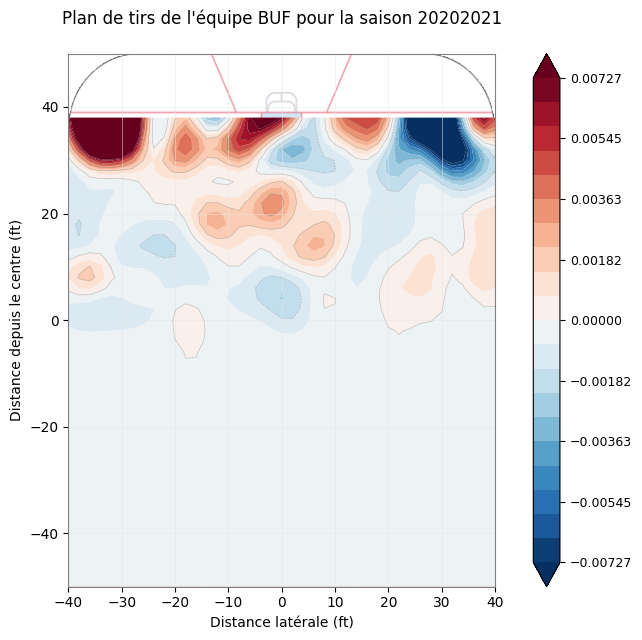

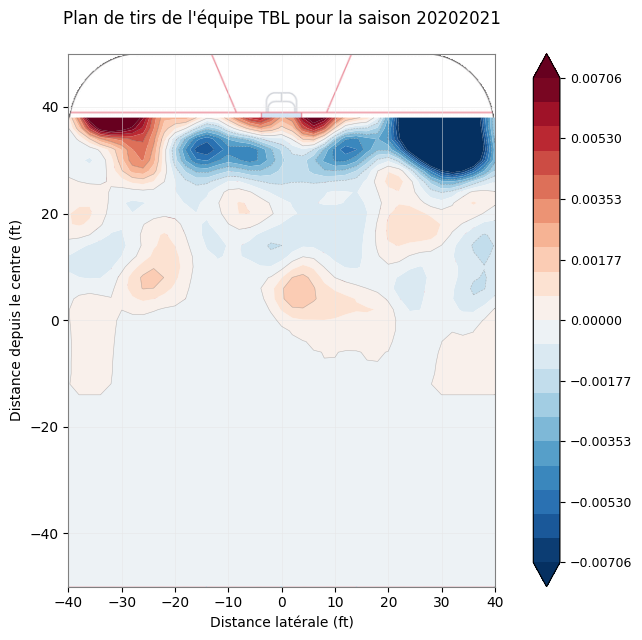

In [7]:
list_teams = ["BUF", "TBL"]
seasons = ["20182019", "20192020", "20202021"]   
for season in seasons:
    df_prep, meta = g.preparer_donnees_tirs_saison_csv(season, str(DEST), RINK_IMG)
    for team in list_teams:
        g.plot_team_season(df_prep, meta, team_name=team, season=season, sigma_lissage=1.6)